# Multivariate regression exercise

October 2021  
Data Science study group
  
Practical example of multivariate regression to illustrate good practices in notebooks.

## Libraries

In [1]:
#General purpose
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

#Scaler
from sklearn.preprocessing import StandardScaler

#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn import metrics
import shap

## Import data

In [2]:
df = pd.read_csv('CO2_Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Datasets description  

Make -> Company  
Vehicle Class -> depending on their utility, capacity and weight  
Trasmission -> Transmission type with number of gears  
Fuel Consumption City (L/100 km) -> Fuel consumption in city roads (L/100 km)  
Fuel Consumption Hwy (L/100 km) -> Fuel consumption in highways roads (L/100 km)  
Fuel Consumption Comb (mpg) -> The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Univariate analysis

In [6]:
def bar_graph_values(col):
    sns.countplot(y =col,
                  data=df,
                  orient = "h",
                  order=df[col].value_counts().index)

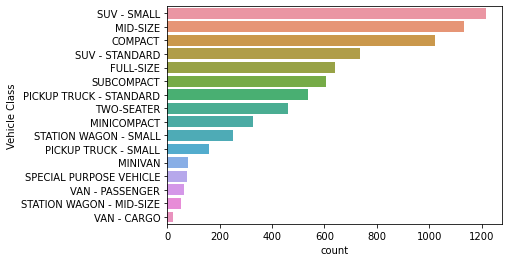

In [7]:
bar_graph_values('Vehicle Class')

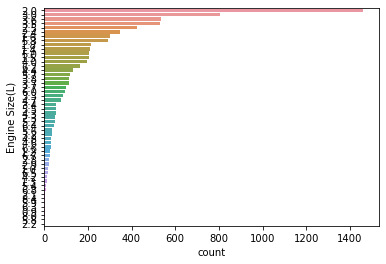

In [8]:
bar_graph_values('Engine Size(L)')

In [9]:
#More detail description
def generate_stats(col):
    print(col+" statical")
    print("Max value: ",df[col].max())
    print("Min value: ",df[col].min())
    print("Moda: ",df[col].mode())
    print("Avg value: ",df[col].mean())
    print("Std value: ",df[col].std())

In [10]:
generate_stats('Engine Size(L)')

Engine Size(L) statical
Max value:  8.4
Min value:  0.9
Moda:  0    2.0
Name: Engine Size(L), dtype: float64
Avg value:  3.1600677048070125
Std value:  1.354170455562269


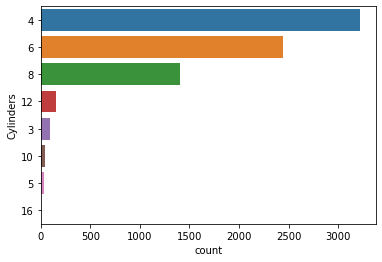

In [11]:
bar_graph_values('Cylinders')

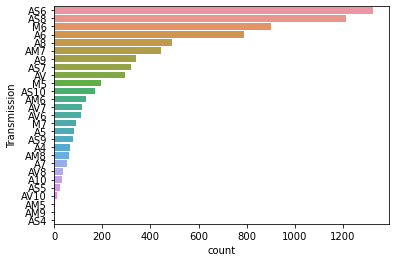

In [12]:
bar_graph_values('Transmission')

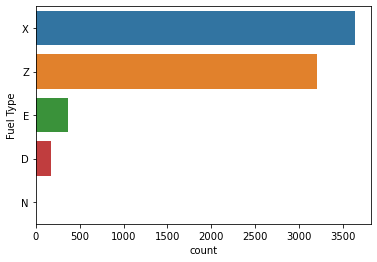

In [13]:
bar_graph_values('Fuel Type')

<AxesSubplot:>

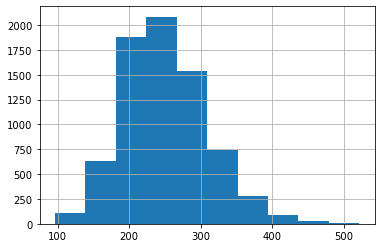

In [14]:
df['CO2 Emissions(g/km)'].hist()

### Bivariate analysis

In [15]:
def box_graph_bivar(colx,coly):
    plt.figure(figsize = (10,10))
    sns.boxplot(data = df, x=colx, y=coly, palette = 'cubehelix')
    plt.xticks(rotation = 90)
    plt.show()

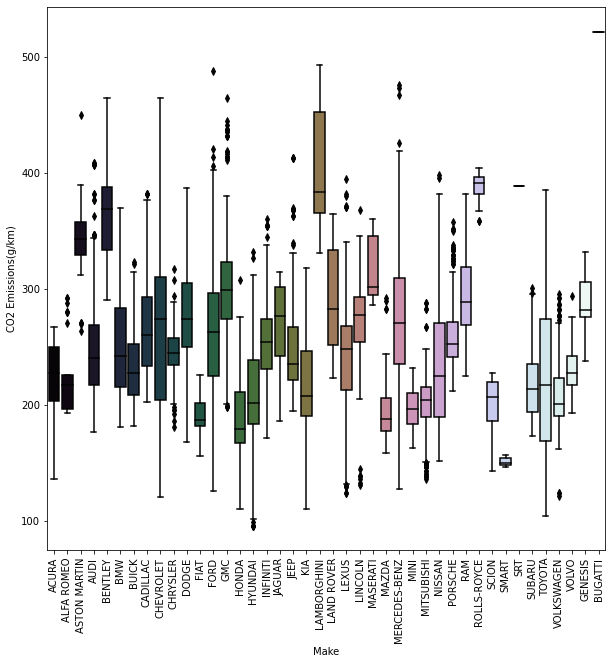

In [16]:
box_graph_bivar('Make', 'CO2 Emissions(g/km)')

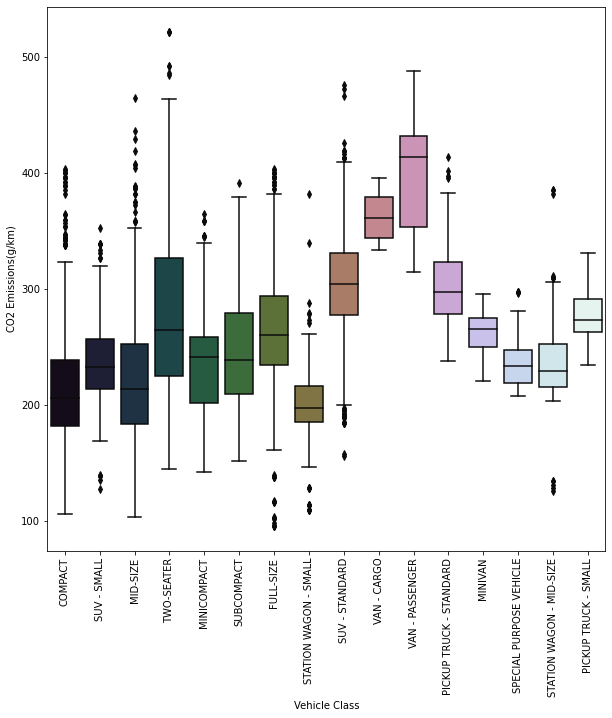

In [17]:
box_graph_bivar('Vehicle Class', 'CO2 Emissions(g/km)')

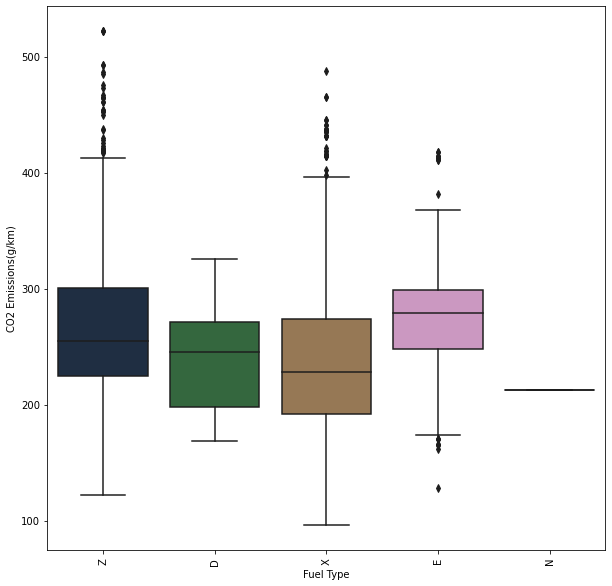

In [18]:
box_graph_bivar('Fuel Type', 'CO2 Emissions(g/km)')

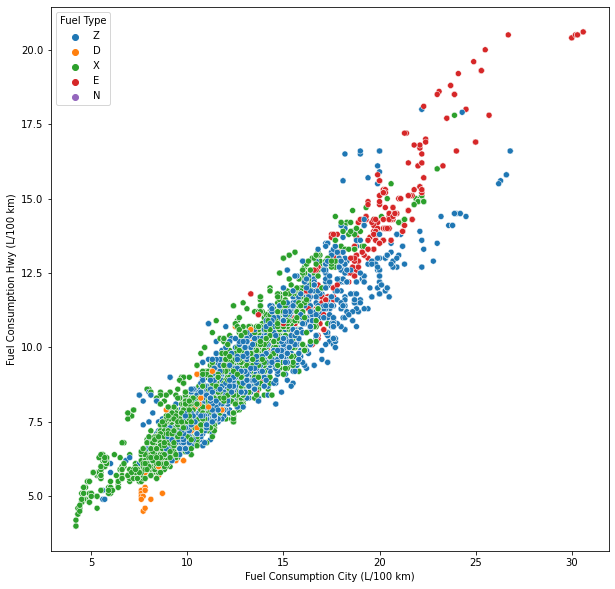

In [19]:
# City Fuel Consumption vs Highway Fuel Consumption with Fuel Category
plt.figure(figsize = (10,10))
sns.scatterplot(data=df, 
                x='Fuel Consumption City (L/100 km)', 
                y='Fuel Consumption Hwy (L/100 km)',
                hue='Fuel Type')
plt.show()

In [20]:
df.groupby(by = 'Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()

Fuel Type
D     8.835429
E    16.861351
N    12.700000
X    10.084575
Z    11.422767
Name: Fuel Consumption Comb (L/100 km), dtype: float64

In [21]:
# Pivot table with Cylinders, Fuel Type and C02 Emissions
df.pivot_table(values = ['CO2 Emissions(g/km)'], index = ['Cylinders','Fuel Type'], aggfunc = 'mean')

CO2 Emissions(g/km)
Cylinders Fuel Type                     
3         X                   160.432432
          Z                   184.120690
4         D                   215.460674
          E                   203.370370
          X                   199.208906
          Z                   216.315735
5         X                   233.150000
          Z                   244.166667
6         D                   260.406977
          E                   262.723270
          N                   213.000000
          X                   271.614793
          Z                   256.478861
8         E                   312.286624
          X                   329.651054
          Z                   317.503667
10        X                   488.000000
          Z                   358.219512
12        Z                   381.033113
16        Z                   522.000000

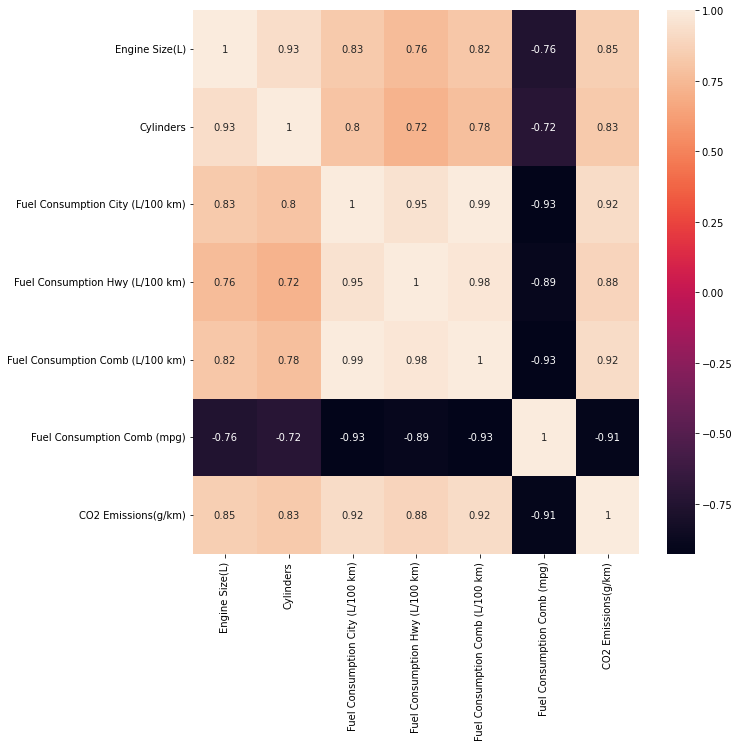

In [22]:
# Heatmap for correlation values
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

 All Numerical Values are highly correlated to C02 Emission.

## ETL

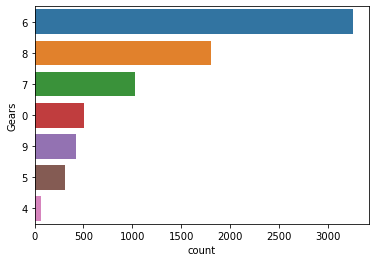

In [23]:
#From trasmission, I only need gears (last value)
df['Gears'] = df['Transmission'].apply(lambda x:x[-1])
df['Gears'] = df['Gears'].replace('V','0')
df['Gears'].astype('int')
bar_graph_values('Gears')

### Outlier Treatment
Tukey Test

In [24]:
#Relevate quantile
Q1=df['CO2 Emissions(g/km)'].quantile(0.25)
Q3=df['CO2 Emissions(g/km)'].quantile(0.75)
#Interquantile range
IQR=Q3-Q1
#Filter
df = df.loc[df['CO2 Emissions(g/km)']<= (Q3+1.5*IQR)]
#Final shape
df.shape

(7305, 13)

The df shape continues to be useful to perform regression.

### Select meaningful data

In [25]:
cols = ['Vehicle Class',
       'Engine Size(L)',
       'Cylinders',
       'Gears',
       'Fuel Type',
       'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)']
model_df = df[cols]
model_df.head()

,Vehicle Class,Engine Size(L),Cylinders,Gears,Fuel Type,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.0,4,5,Z,33,196
1,COMPACT,2.4,4,6,Z,29,221
2,COMPACT,1.5,4,7,Z,48,136
3,SUV - SMALL,3.5,6,6,Z,25,255
4,SUV - SMALL,3.5,6,6,Z,27,244


### Encoding

In [26]:
#Vehicle Class
le_vehicle = LabelEncoder()
model_df['Vehicle Class'] = le_vehicle.fit_transform(model_df['Vehicle Class'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
#Fuel Type
le_fuel = LabelEncoder()
model_df['Fuel Type'] = le_fuel.fit_transform(model_df['Fuel Type'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Scaler

In [28]:
scaler = StandardScaler()
scaler.fit(model_df)
scaler_df = pd.DataFrame(scaler.transform(model_df), 
                      columns = model_df.columns)
scaler_df.head()

,Vehicle Class,Engine Size(L),Cylinders,Gears,Fuel Type,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,-1.314247,-0.851483,-0.884520,-0.654583,0.837014,0.752982,-0.949323
1,-1.314247,-0.549688,-0.884520,-0.160501,0.837014,0.192775,-0.497501
2,-1.314247,-1.228728,-0.884520,0.333582,0.837014,2.853758,-2.033696
3,0.984041,0.280251,0.240281,-0.160501,0.837014,-0.367432,0.116978
4,0.984041,0.280251,0.240281,-0.160501,0.837014,-0.087329,-0.081824


## Model

### Split datasets

In [29]:
target = scaler_df['CO2 Emissions(g/km)']
features = scaler_df[scaler_df.columns.drop('CO2 Emissions(g/km)')]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

### BuIlding & Training

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [32]:
y_pred = regr.predict(X_test)

In [33]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

0.20899494755746365
0.08705853501364517
0.29505683353151674
0.9090906763783508


### Shapley

Shapley Additive explanations is inspired by game theory to explain black-box function, like "predict" in Machine Learning models.

It provides a way of measuring the contribution of each feature to produced output in the prediction.

In [34]:
explainer = shap.Explainer(regr.predict, X_train)
shap_values = explainer(X_train)

Exact explainer: 5845it [00:15, 151.12it/s]                          


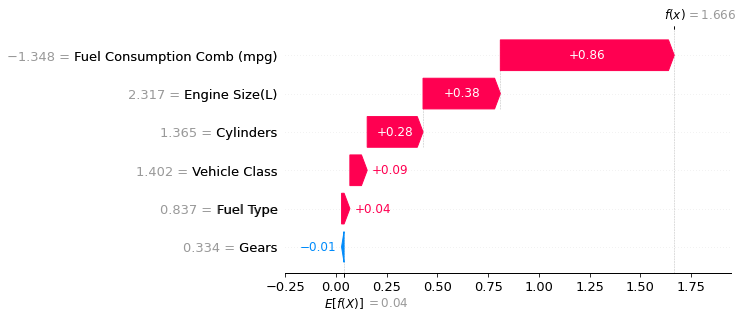

In [35]:
shap.plots.waterfall(shap_values[0])

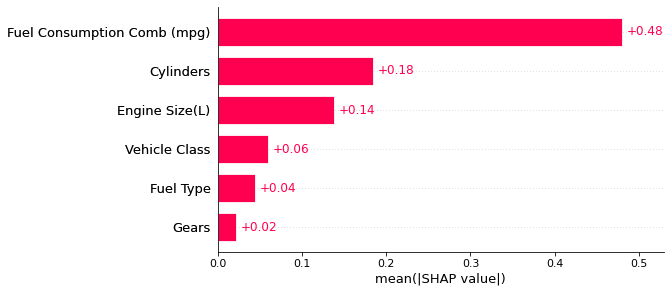

In [36]:
shap.plots.bar(shap_values)

Of course, the most important feature to predict emissions is Fuel Consumption Comb.